In [3]:
import os
import sys
import importlib
import glob
import time
from tqdm import tqdm

import torch
import numpy as np
import matplotlib.pyplot as plt
from src.RationalApproximation import RationalApproximation_AAA
from scipy.special import gamma 
from scipy.integrate import ode
import pandas as pd 

In [3]:
def f(t,x):
    pole = 2 
    weight = 3 
    return - pole * x + weight * t**5  

In [16]:
# Analytical solution modes 
@np.vectorize
def sol_modes(t, a=2, w=3): 
    # w = weights 
    # a = poles 
    # the constant is chosen such that the modes have initial condition u_k(0)=0
    c = 120 * w / a ** 6 
    return (w * (- 120        / a**6 
                 + 120 * t**1 / a**5 
                 - 60  * t**2 / a**4 
                 + 20  * t**3 / a**3 
                 - 5   * t**4 / a**2 
                 + 1   * t**5 / a) 
                 + c * np.exp(-a*t))

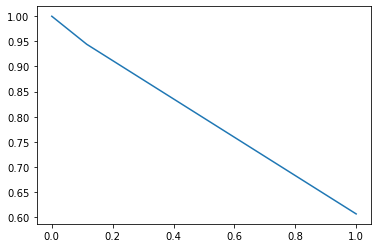

In [14]:
import numpy as np
from scipy.integrate import solve_ivp

def exponential_decay(t, y): return -0.5 * y 

sol = solve_ivp(exponential_decay, [0, 1], [1])

plt.plot(sol.t,sol.y[0])